# **Proyek Akhir: Bike Sharing**

---

### Dicoding Submission
### Belajar Analisis Data dengan Python

---

# Data Diri

Nama: Daffa Albari

E-mail: daffaa.albari@gmail.com

Dicoding Username: khaizuree

---

# 1. Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan layanan *bike sharing* berubah sepanjang tahun, bulan, dan jam?
- Bagaimana cuaca memengaruhi penggunaan layanan *bike sharing*?
- Bagaimana musim mempengaruhi penggunaan layanan *bike sharing*?

In [1]:
import os
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Data Wrangling

## 2.1 Data Loading
Dataset yang digunakan pada project kali ini adalah dataset *Bike Sharing*

## 2.2 Data Gathering

In [2]:
day_df = pd.read_csv('./data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('./data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### 2.3 Data Assessment

### Dataset Overview

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan hasil pengecekan data, terdapat beberapa kesalahan pada data yang perlu diperbaiki, yaitu:
- Tipe data pada kolom `dteday` harus diubah menjadi `datetime`

In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan hasil pengecekan data, terdapat beberapa kesalahan pada data yang perlu diperbaiki, yaitu:
- Tipe data pada kolom `dteday` harus diubah menjadi `datetime`

### Mengecek Missing Values

In [6]:
print('Jumlah data yang day_df terdapat missing values')
print('========================================')
print(day_df.isnull().sum())
print('\n')
print('Jumlah data yang hour_df terdapat missing values')
print('========================================')
print(hour_df.isnull().sum())

Jumlah data yang day_df terdapat missing values
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Jumlah data yang hour_df terdapat missing values
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Berdasarkan hasil pengecekan, tidak terdapat missing values pada dataset.

### Mengecek Duplikasi Data

In [7]:
print(f'Jumlah data yang day_df terdapat duplikasi: {day_df.duplicated().sum()}')
print(f'Jumlah data yang hour_df terdapat duplikasi: {hour_df.duplicated().sum()}')

Jumlah data yang day_df terdapat duplikasi: 0
Jumlah data yang hour_df terdapat duplikasi: 0


Berdasarkan hasil pengecekan, tidak terdapat duplikasi data pada dataset.

### Deskripsi Statistika Dataset

In [8]:
# Untuk day_df
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Berdasarkan informasi atau deksripsi statistik untuk DataFrame `day_df` di atas, dapat dilihat bahwa tidak terdapat parameter statistik yang tidak sesuai dengan kolom atau atirbut masing-masing data dari DataFrame tersebut.

In [9]:
# Untuk hour_df
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Berdasarkan informasi atau deksripsi statistik untuk DataFrame `hour_df` di atas, dapat dilihat bahwa tidak terdapat parameter statistik yang tidak sesuai dengan kolom atau atirbut masing-masing data dari DataFrame tersebut.

### Data Cleaning

Memperbaiki tipe data pada kolom `dteday` dan `season`

In [10]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['dteday'].head()

hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['dteday'].head()

0   2011-01-01
1   2011-01-01
2   2011-01-01
3   2011-01-01
4   2011-01-01
Name: dteday, dtype: datetime64[ns]

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

# 3. Exploratory Data Analysis (EDA)

Penjelesan tiap kolom pada dataset:

|  Kolom Data  | Keterangan |
|--------------|------------|
| `season`     | Telah mengalami proses *label encoding*, pengubahan dari data bertipe *string* menjadi numerik. |
| `yr`         | Telah mengalami proses *ordinal encoding*, pengubahan data secara berurutan dari tahun menjadi numerik. |
| `holiday`    | Telah mengalami proses *binary encoding*, pengubahan dari data bertipe *string* menjadi nilai *boolean*. |
| `weekday`    | Telah mengalami proses *ordinal encoding*, pengubahan data secara berurutan dari hari menjadi numerik. |
| `workingday` | Telah mengalami proses *label encoding*, pengubahan dari data bertipe *string* menjadi nilai *boolean*. |
| `weathersit` | Telah mengalami proses *ordinal encoding*, pengubahan data secara berurutan dari tingkatan jenis cuaca bertipe *string* menjadi numerik. |
| `temp`       | Telah mengalami normalisasi dengan melakukan pembagian nilainya menjadi 41 (max). |
| `atemp`      | Telah mengalami normalisasi dengan melakukan pembagian nilainya menjadi 50 (max). |
| `hum`        | Telah mengalami normalisasi dengan melakukan pembagian nilainya menjadi 100 (max). |
| `windspeed`  | Telah mengalami normalisasi dengan melakukan pembagian nilainya menjadi 67 (max). |

### Label and Ordinal Encoding
Berdasarkan dataset yang digunakan, beberapa kolom memiliki tipe data *string* yang perlu diubah menjadi numerik. Hal ini dilakukan agar model machine learning dapat memahami data yang diberikan.

In [14]:
day_df.replace({
    'season': {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'yr': {0: 2011, 1: 2012},
    'holiday': {0: 'Not Holiday', 1: 'Holiday'},
    'workingday': {0: 'Holiday', 1: 'Working Day'},
    'weekday': {
        0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
    },
    'weathersit': {
        1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow', 4: 'Heavy Rain'
    }
}, inplace=True)

hour_df.replace({
    'season': {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'yr': {0: 2011, 1: 2012},
    'holiday': {0: 'Holiday', 1: 'Not Holiday'},
    'workingday': {0: 'Holiday', 1: 'Working Day'},
    'weekday': {
        0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
    },
    'weathersit': {
        1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow', 4: 'Heavy Rain'
    }
}, inplace=True)

In [16]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,0,Holiday,Sat,Holiday,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,1,1,Holiday,Sat,Holiday,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,1,2,Holiday,Sat,Holiday,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,1,3,Holiday,Sat,Holiday,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,1,4,Holiday,Sat,Holiday,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [18]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,Not Holiday,Sat,Holiday,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,1,Not Holiday,Sun,Holiday,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,1,Not Holiday,Mon,Working Day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,1,Not Holiday,Tue,Working Day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,1,Not Holiday,Wed,Working Day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Denormalization Data
Berdasarkan dataset yang digunakan, beberapa kolom memiliki nilai yang telah dinormalisasi. Hal ini dilakukan agar model machine learning dapat memahami data yang diberikan.

In [19]:
day_df.temp = day_df.temp.multiply(41)
day_df.atemp = day_df.atemp.multiply(50)
day_df.hum = day_df.hum.multiply(100)
day_df.windspeed = day_df.windspeed.multiply(67)

hour_df.temp = hour_df.temp.multiply(41)
hour_df.atemp = hour_df.atemp.multiply(50)
hour_df.hum = hour_df.hum.multiply(100)
hour_df.windspeed = hour_df.windspeed.multiply(67)
     

In [20]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,0,Holiday,Sat,Holiday,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Springer,2011,1,1,Holiday,Sat,Holiday,Clear,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Springer,2011,1,2,Holiday,Sat,Holiday,Clear,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Springer,2011,1,3,Holiday,Sat,Holiday,Clear,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Springer,2011,1,4,Holiday,Sat,Holiday,Clear,9.84,14.395,75.0,0.0,0,1,1


In [22]:
hour_df.describe()

,instant,dteday,yr,mnth,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2011.502561,6.537775,11.546752,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,2011.000000,1.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2011.000000,4.000000,6.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,2012.000000,7.000000,12.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,2012.000000,10.000000,18.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,2012.000000,12.000000,23.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.500008,3.438776,6.914405,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599


In [21]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,Not Holiday,Sat,Holiday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Springer,2011,1,Not Holiday,Sun,Holiday,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Springer,2011,1,Not Holiday,Mon,Working Day,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Springer,2011,1,Not Holiday,Tue,Working Day,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Springer,2011,1,Not Holiday,Wed,Working Day,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [23]:
day_df.describe()

,instant,dteday,yr,mnth,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2011.500684,6.519836,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,2011.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2011.000000,4.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,2012.000000,7.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,2012.000000,10.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,2012.000000,12.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,3.451913,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


## Data distribution

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>]], dtype=object)

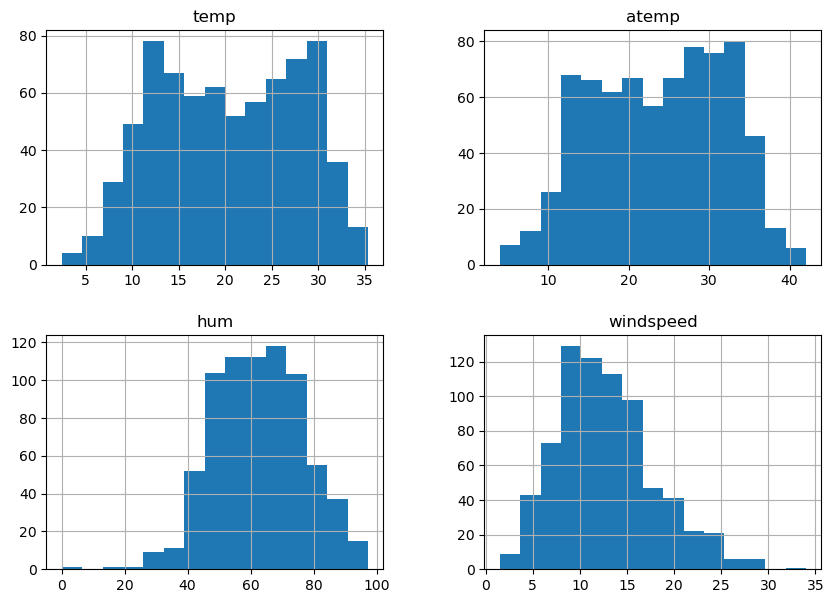

In [24]:
df_day_num = day_df[['temp', 'atemp', 'hum', 'windspeed']]
df_day_num.hist(bins=15, figsize=(10, 7))

Berdasarkan hasil pengamatan plot atau grafik histogram untuk DataFrame `df_day` di atas, dapat dilihat bahwa:
- Kolom `temp` memiliki bentuk histogram yang *left-skewed* (*negative skewness*).
- Kolom `atemp` memiliki bentuk histogram yang *left-skewed* (*negative skewness*).
- Kolom `hum` memiliki bentuk histogram yang *left-skewed* (*negative skewness*).
- Kolom `windspeed` memiliki bentuk histogram yang *right-skewed* (*positive skewness*).

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>]], dtype=object)

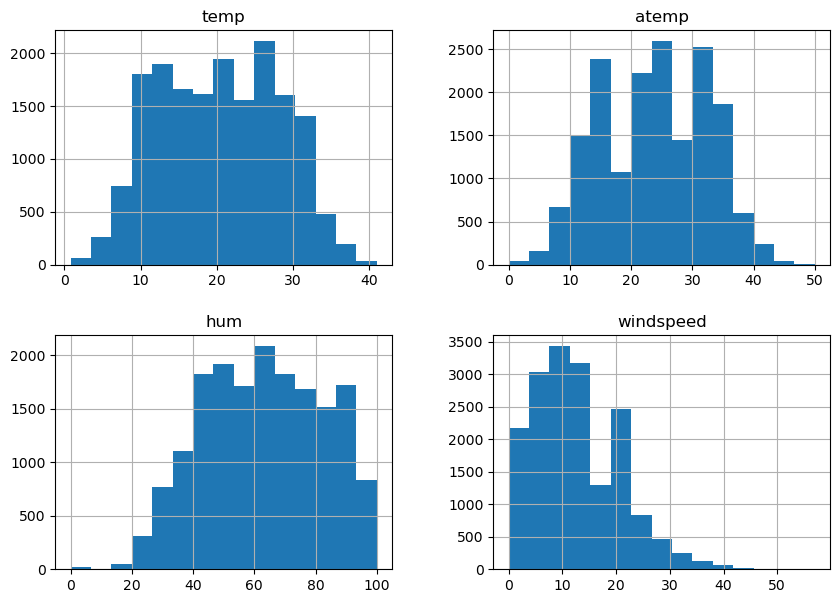

In [25]:
df_hour_num = hour_df[['temp', 'atemp', 'hum', 'windspeed']]
df_hour_num.hist(bins=15, figsize=(10, 7))

Berdasarkan hasil pengamatan plot atau grafik histogram untuk DataFrame `df_hour` di atas, dapat dilihat bahwa:
- Kolom `temp` memiliki bentuk histogram yang *left-skewed* (*negative skewness*).
- Kolom `atemp` memiliki bentuk histogram yang *left-skewed* (*negative skewness*).
- Kolom `hum` memiliki bentuk histogram yang *left-skewed* (*negative skewness*).
- Kolom `windspeed` memiliki bentuk histogram yang *right-skewed* (*positive skewness*).

## Data Correlation

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik df_day')

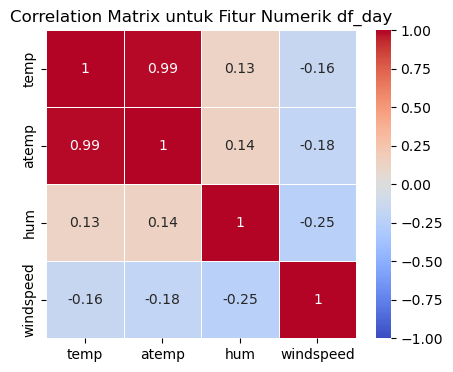

In [26]:
plt.figure(figsize=(5, 4))
correlationMatrix = df_day_num.corr().round(2)

sns.heatmap(
    data=correlationMatrix,
    vmin=-1,
    vmax=1,
    cmap='coolwarm',
    annot=True,
    linewidths=0.5
)

plt.title('Correlation Matrix untuk Fitur Numerik df_day')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik df_hour')

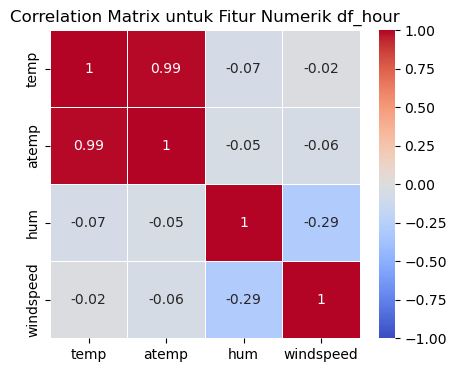

In [27]:
plt.figure(figsize=(5, 4))
correlationMatrix = df_hour_num.corr().round(2)

sns.heatmap(
    data=correlationMatrix,
    vmin=-1,
    vmax=1,
    cmap='coolwarm',
    annot=True,
    linewidths=0.5
)

plt.title('Correlation Matrix untuk Fitur Numerik df_hour')

Dapat dilihat pada grafik atau diagram *heatmap* di atas memiliki *range* atau rentang dari angka 1.0 hingga -1.0 dengan keterangan sebagai berikut,
- Jika semakin mendekati 1, maka korelasi antar fitur numerik semakin kuat bernilai positif.
- Jika semakin mendekati 0, maka korelasi antar fitur numerik semakin rendah.
- Jika semakin mendekati -1, maka korelasi antar fitur numerik semakin kuat bernilai negatif.


- Jika korelasi bernilai positif, berarti nilai kedua fitur numerik cenderung meningkat bersama-sama.
- Jika korelasi bernilai negatif, berarti nilai salah satu fitur numerik cenderung meningkat ketika nilai fitur numerik yang lain menurun.

### Multivariate Analysis

c:\Users\daffa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


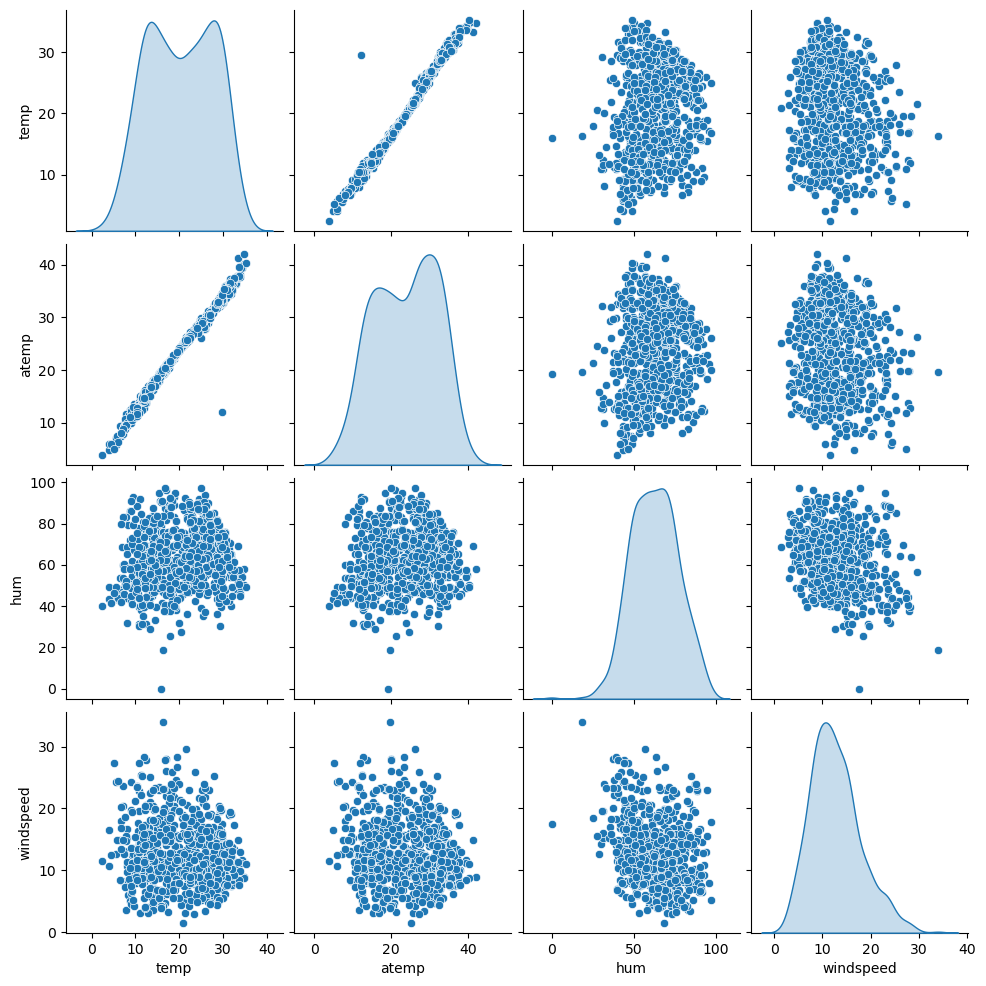

In [28]:

sns.pairplot(data=df_day_num, diag_kind='kde')

c:\Users\daffa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


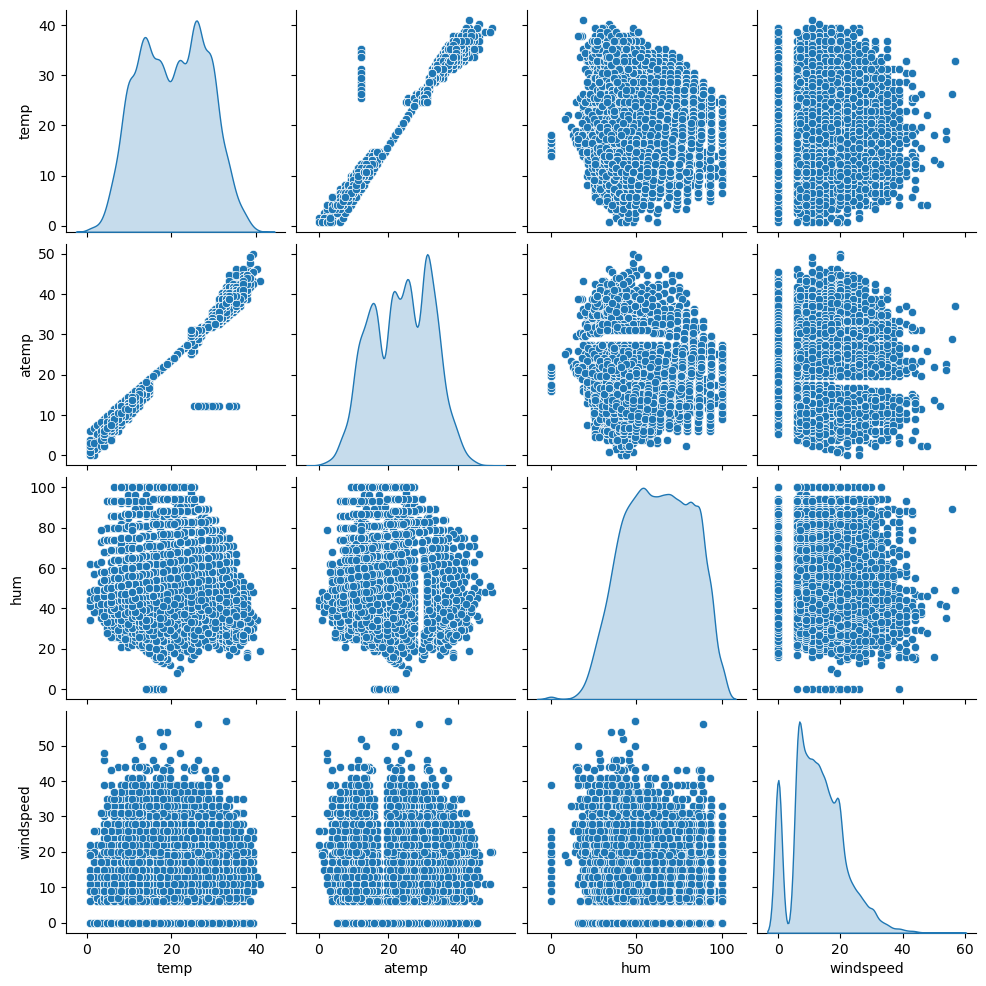

In [29]:
sns.pairplot(data=df_hour_num, diag_kind='kde')

Berdasarkan hasil pengamatan plot atau grafik *scatter* untuk DataFrame `day_df` dan `hour_df` di atas, dapat dilihat bahwa:
- Terdapat korelasi positif yang kuat antara kolom `temp` dan `atemp`.
- Tidak terdapat korelasi antara kolom `hump` dan `windspeed`.

# Explantory Data Analysis (EDA)

- Bagaimana pola penggunaan layanan *bike sharing* berubah sepanjang tahun, bulan, dan jam?
- Bagaimana cuaca memengaruhi penggunaan layanan *bike sharing*?
- Bagaimana musim mempengaruhi penggunaan layanan *bike sharing*?

## 1. Bagaimana pola penggunaan layanan *bike sharing* berubah sepanjang tahun, bulan, dan jam?

### Tahun

In [30]:
df_year = day_df.groupby('yr').instant.nunique().reset_index()
df_year.rename(columns={'instant': 'sum'}, inplace=True)
df_year

,yr,sum
0,2011,365
1,2012,366


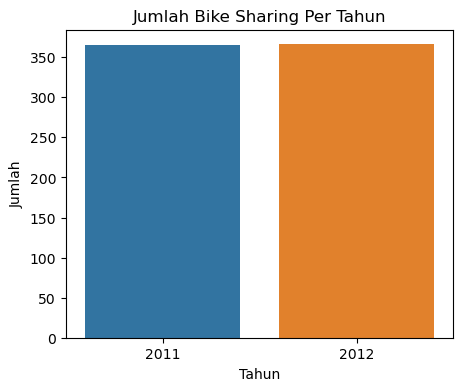

In [31]:
plt.figure(figsize=(5, 4))
sns.barplot(
    data=df_year.sort_values('yr', ascending=False),
    x='yr',
    y='sum',
)

plt.title('Jumlah Bike Sharing Per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.show()

### Bulan

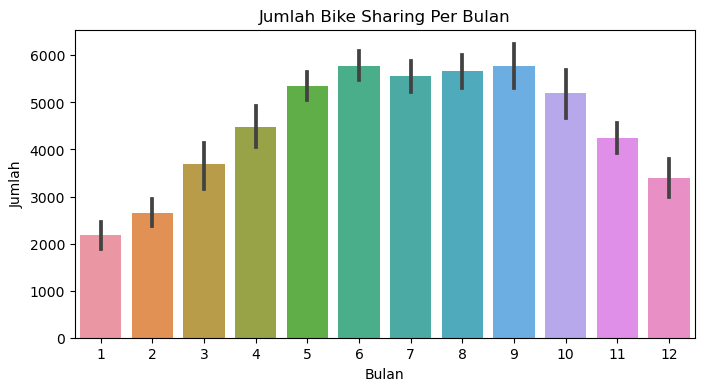

In [33]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=day_df.sort_values('mnth', ascending=False),
    x='mnth',
    y='cnt',
)

plt.title('Jumlah Bike Sharing Per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.show()

### Jam

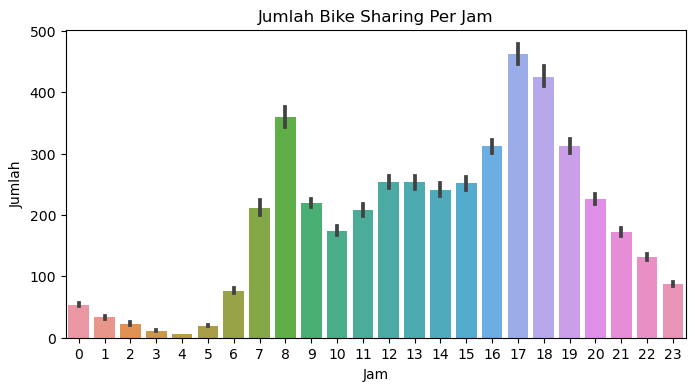

In [35]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=hour_df.sort_values('hr', ascending=False),
    x='hr',
    y='cnt',
)

plt.title('Jumlah Bike Sharing Per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah')
plt.show()

## 2. Bagaimana cuaca memengaruhi penggunaan layanan *bike sharing*?

In [36]:
df_holiday = day_df.groupby('holiday').instant.nunique().reset_index()
df_holiday.rename(columns={'instant': 'sum'}, inplace=True)
df_holiday
     

,holiday,sum
0,Holiday,21
1,Not Holiday,710


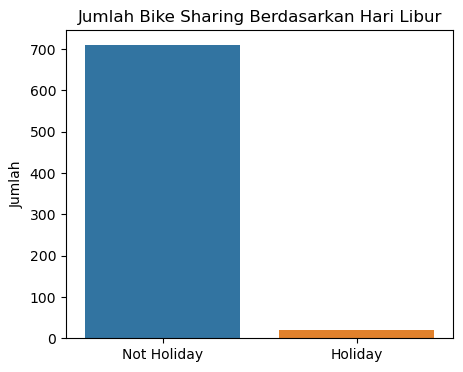

In [37]:
plt.figure(figsize=(5, 4))
sns.barplot(
    data=df_holiday.sort_values('holiday', ascending=False),
    x='holiday',
    y='sum',
)

plt.title('Jumlah Bike Sharing Berdasarkan Hari Libur')
plt.xlabel(None)
plt.ylabel('Jumlah')
plt.show()

## 3. Bagaimana musim mempengaruhi penggunaan layanan *bike sharing*?

In [38]:
df_season = day_df.groupby('season').instant.nunique().reset_index()
df_season.rename(columns={'instant': 'sum'}, inplace=True)
df_season

,season,sum
0,Fall,188
1,Springer,181
2,Summer,184
3,Winter,178


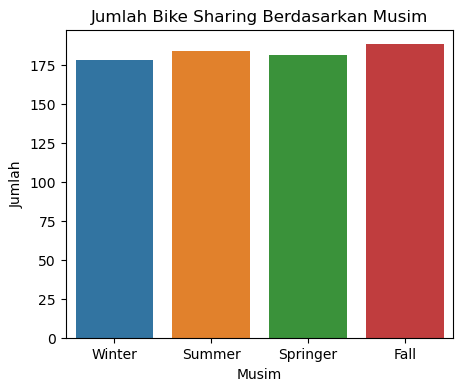

In [40]:
plt.figure(figsize=(5, 4))
sns.barplot(
    data=df_season.sort_values('season', ascending=False),
    x='season',
    y='sum',
)

plt.title('Jumlah Bike Sharing Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah')
plt.show()

# Kesimpulan

Dapat disimpulkan bahwa:
- Berdasarkan pengamatan pada DataFrame df_season pada kolom season dan sum, terlihat bahwa jumlah penggunaan bike sharing tertinggi terjadi pada musim gugur (fall). Hal ini menunjukkan bahwa musim gugur memiliki pengaruh yang kuat terhadap penggunaan bike sharing.
- Dari analisis DataFrame df_yr pada kolom yr dan sum, ditemukan bahwa tren penggunaan bike sharing paling tinggi terjadi pada tahun 2012. Dengan demikian, dapat disimpulkan bahwa tren penggunaan bike sharing paling tinggi terjadi pada tahun 2012.
- Hasil pengamatan pada DataFrame df_day pada kolom mnth dan cnt menunjukkan bahwa, bulan dengan jumlah penggunaan bike sharing terbanyak adalah bulan Juni. Oleh karena itu, dapat disimpulkan bahwa bulan Juni memiliki tren penggunaan bike sharing yang tinggi.

In [41]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,Not Holiday,Sat,Holiday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Springer,2011,1,Not Holiday,Sun,Holiday,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Springer,2011,1,Not Holiday,Mon,Working Day,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Springer,2011,1,Not Holiday,Tue,Working Day,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Springer,2011,1,Not Holiday,Wed,Working Day,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Springer,2012,12,Not Holiday,Thu,Working Day,Mist + Cloudy,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,728,2012-12-28,Springer,2012,12,Not Holiday,Fri,Working Day,Mist + Cloudy,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,729,2012-12-29,Springer,2012,12,Not Holiday,Sat,Holiday,Mist + Cloudy,10.386653,12.12000,75.2917,8.333661,159,1182,1341
729,730,2012-12-30,Springer,2012,12,Not Holiday,Sun,Holiday,Clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [42]:
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,0,Holiday,Sat,Holiday,Clear,9.84,14.395,81.0,0.0000,3,13,16
1,2,2011-01-01,Springer,2011,1,1,Holiday,Sat,Holiday,Clear,9.02,13.635,80.0,0.0000,8,32,40
2,3,2011-01-01,Springer,2011,1,2,Holiday,Sat,Holiday,Clear,9.02,13.635,80.0,0.0000,5,27,32
3,4,2011-01-01,Springer,2011,1,3,Holiday,Sat,Holiday,Clear,9.84,14.395,75.0,0.0000,3,10,13
4,5,2011-01-01,Springer,2011,1,4,Holiday,Sat,Holiday,Clear,9.84,14.395,75.0,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Springer,2012,12,19,Holiday,Mon,Working Day,Mist + Cloudy,10.66,12.880,60.0,11.0014,11,108,119
17375,17376,2012-12-31,Springer,2012,12,20,Holiday,Mon,Working Day,Mist + Cloudy,10.66,12.880,60.0,11.0014,8,81,89
17376,17377,2012-12-31,Springer,2012,12,21,Holiday,Mon,Working Day,Clear,10.66,12.880,60.0,11.0014,7,83,90
17377,17378,2012-12-31,Springer,2012,12,22,Holiday,Mon,Working Day,Clear,10.66,13.635,56.0,8.9981,13,48,61


In [43]:
# Dataset Export 
day_df.to_csv('./data/day_clean.csv', index=False)
hour_df.to_csv('./data/hour_clean.csv', index=False)